In [8]:
#Load the Data:

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Connect to the databases
conn_air_quality = sqlite3.connect('C:/hanif/AI/Dataset/air_quality.db')
air_quality_df = pd.read_sql_query("SELECT * FROM air_quality", conn_air_quality)
conn_air_quality.close()

conn_weather = sqlite3.connect('C:/hanif/AI/Dataset/weather.db')
weather_df = pd.read_sql_query("SELECT * FROM weather", conn_weather)
conn_weather.close()

In [ ]:
# Convert columns to appropriate data types
def convert_to_numeric(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

air_quality_numeric_cols = ['pm25_north', 'pm25_south', 'pm25_east', 'pm25_west', 'pm25_central',
                            'psi_north', 'psi_south', 'psi_east', 'psi_west', 'psi_central']
weather_numeric_cols = ['Daily Rainfall Total (mm)', 'Highest 30 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)',
                        'Highest 120 Min Rainfall (mm)', 'Min Temperature (deg C)', 'Maximum Temperature (deg C)',
                        'Min Wind Speed (km/h)', 'Max Wind Speed (km/h)', 'Sunshine Duration (hrs)',
                        'Cloud Cover (%)', 'Wet Bulb Temperature (deg F)', 'Relative Humidity (%)', 'Air Pressure (hPa)']

air_quality_df = convert_to_numeric(air_quality_df, air_quality_numeric_cols)
weather_df = convert_to_numeric(weather_df, weather_numeric_cols)


In [5]:
#Generate Summary Statistics:
air_quality_summary = air_quality_df.describe()
weather_summary = weather_df.describe()

In [6]:
#Display the Summary Statistics:
print(air_quality_summary)
print(weather_summary)



        pm25_north   pm25_south    pm25_east    pm25_west  pm25_central  \
count  3462.000000  3461.000000  3461.000000  3463.000000   3467.000000   
mean     14.784373    14.471973    14.357122    13.483540     14.050187   
std       9.984766    11.408435    10.283139    11.487083      8.880064   
min       4.000000     3.000000     3.000000     2.000000      3.000000   
25%      10.000000     9.000000     9.000000     8.000000      9.000000   
50%      13.000000    12.000000    12.000000    11.000000     12.000000   
75%      17.000000    16.000000    16.000000    16.000000     16.000000   
max     199.000000   235.000000   176.000000   197.000000    176.000000   

         psi_north    psi_south     psi_east     psi_west  psi_central  
count  3480.000000  3471.000000  3458.000000  3473.000000  3464.000000  
mean     51.555603    50.323250    50.653557    48.122661    50.021218  
std      14.690835    16.052394    14.664614    17.354279    14.065466  
min      18.000000    16.000000 

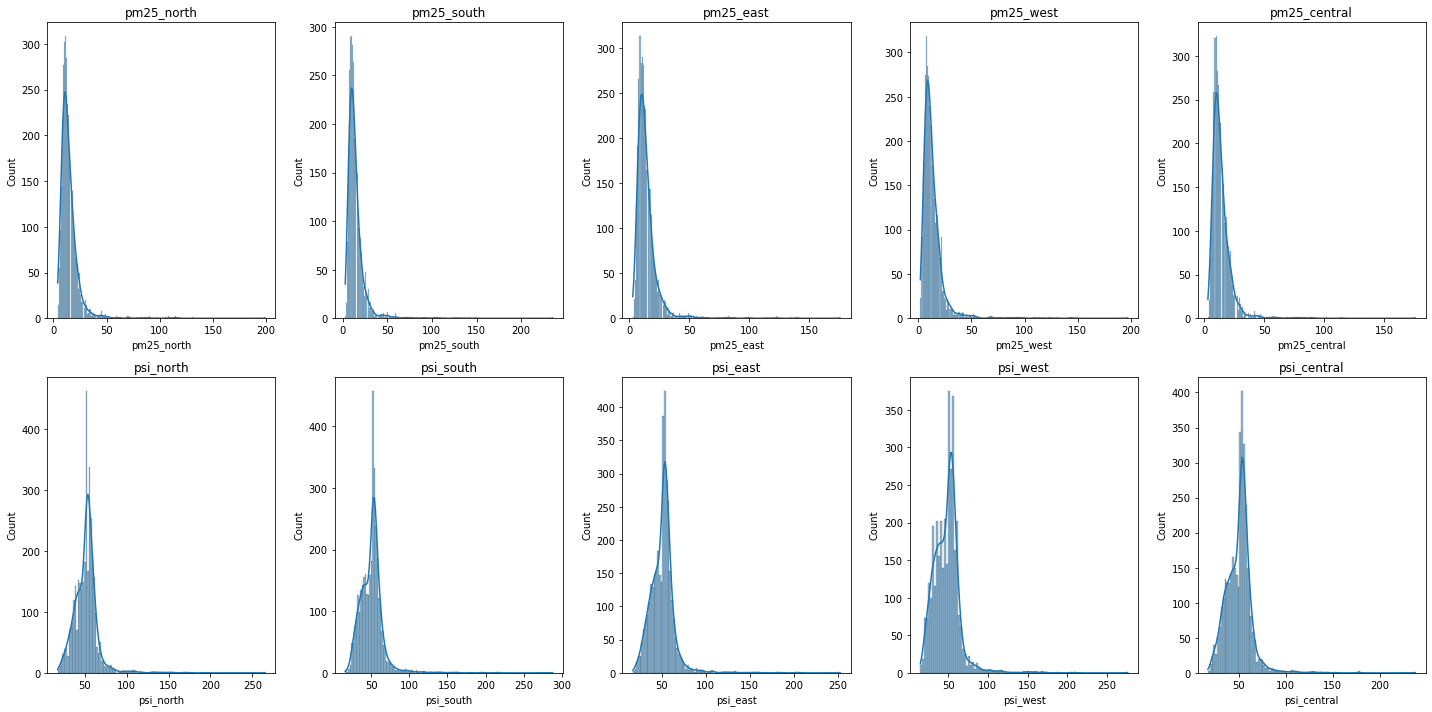

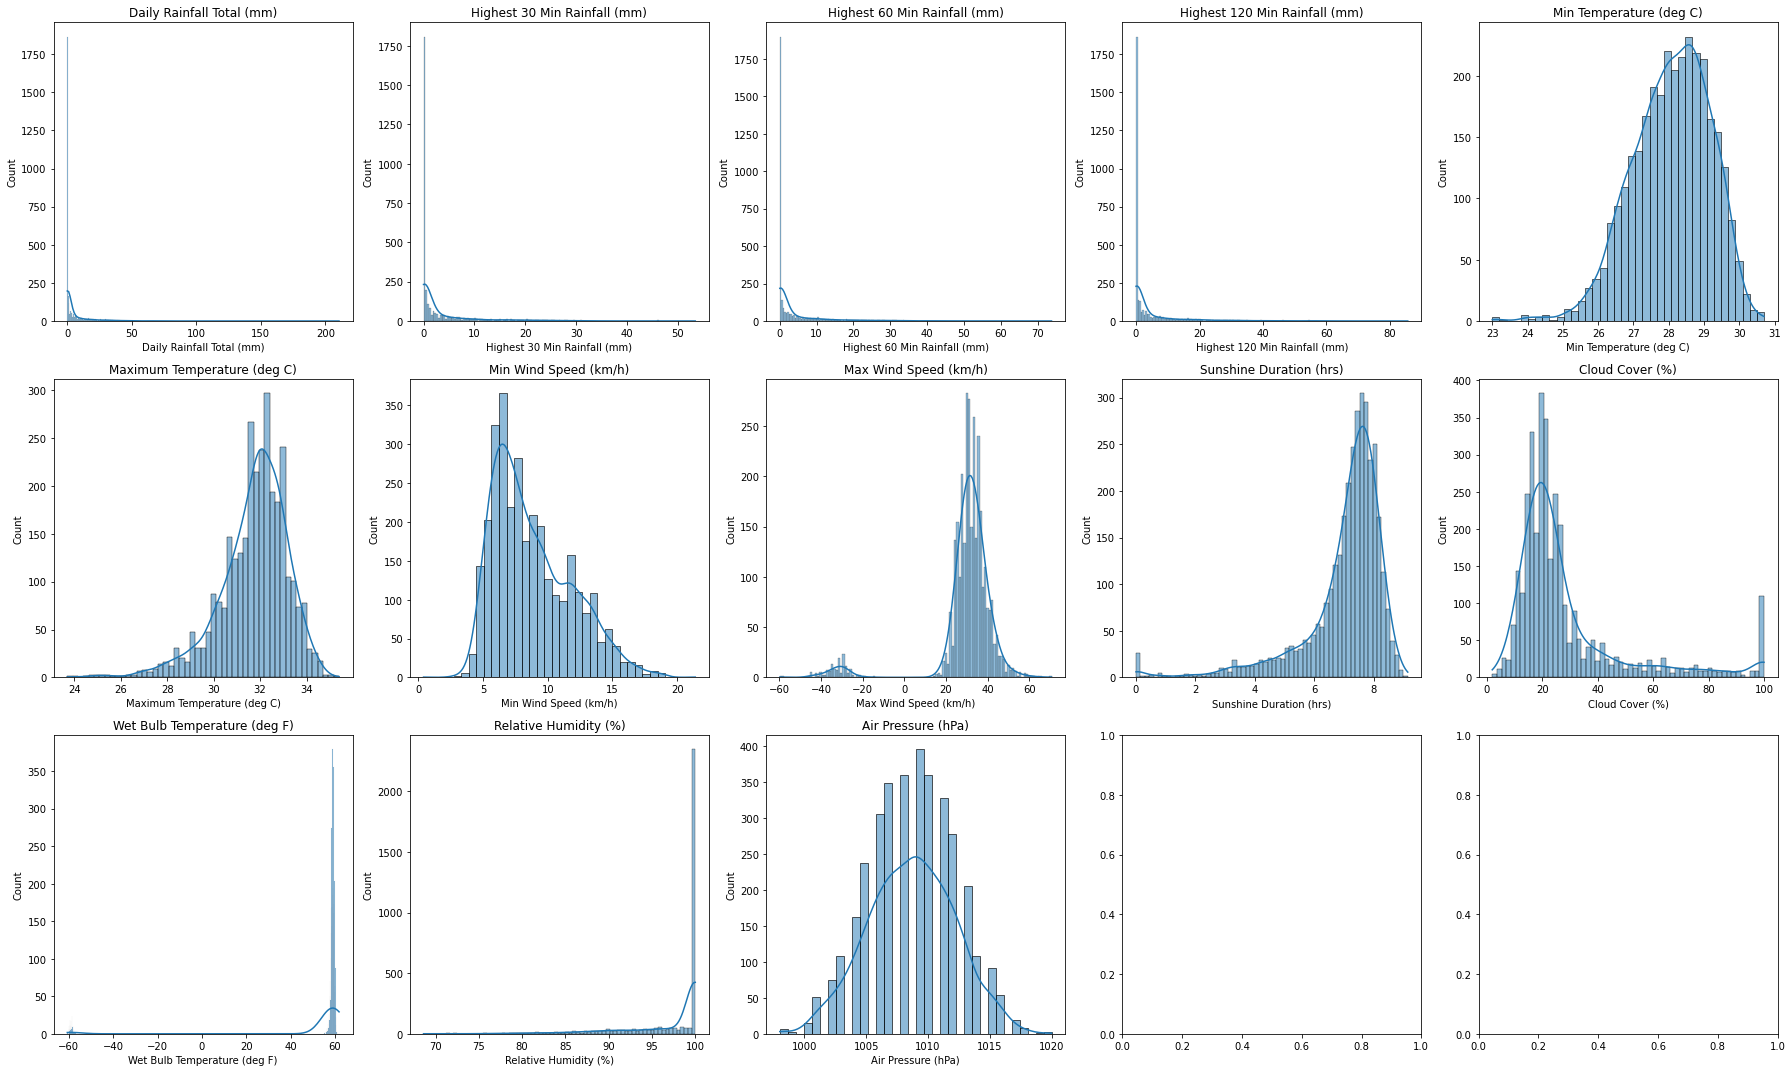

In [9]:
#Summary Statistics Visualization


# Histograms
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for i, col in enumerate(air_quality_numeric_cols):
    sns.histplot(air_quality_df[col], kde=True, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15))
for i, col in enumerate(weather_numeric_cols):
    sns.histplot(weather_df[col], kde=True, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
plt.tight_layout()
plt.show()


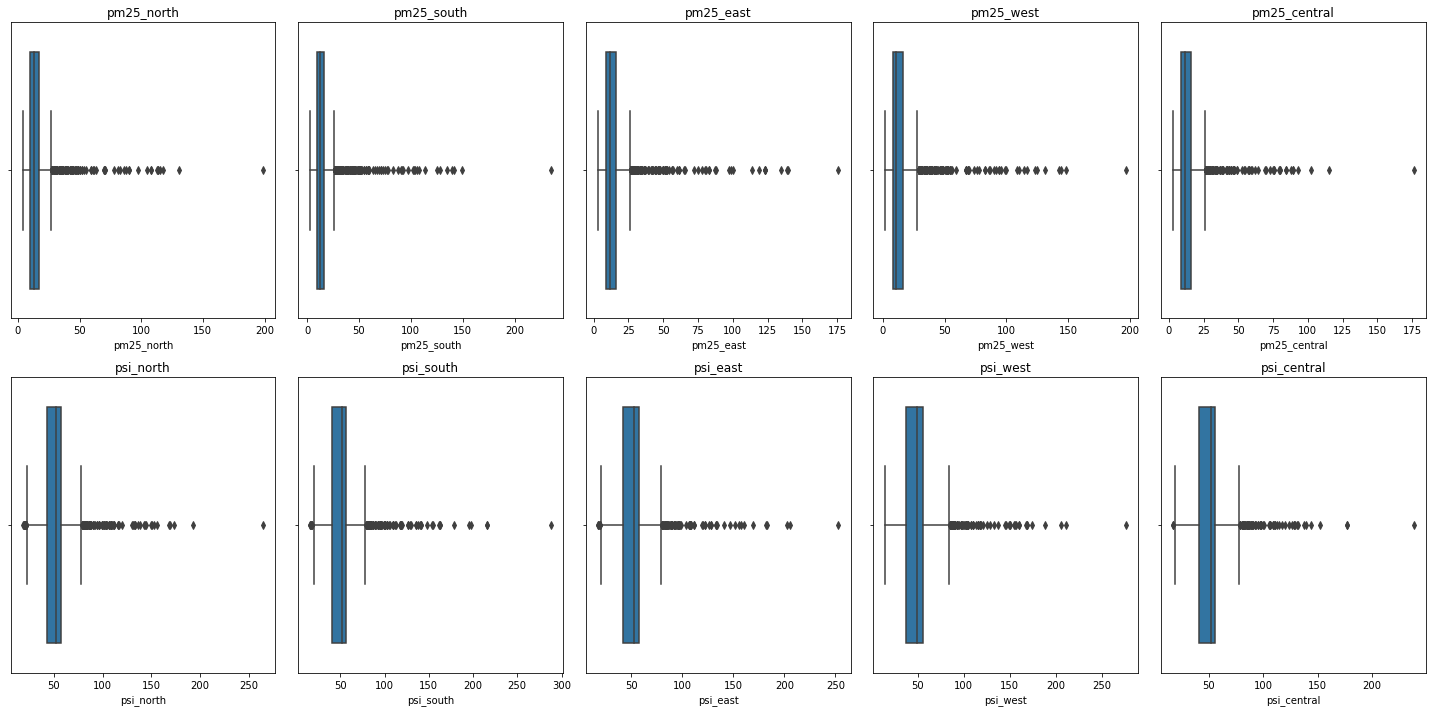

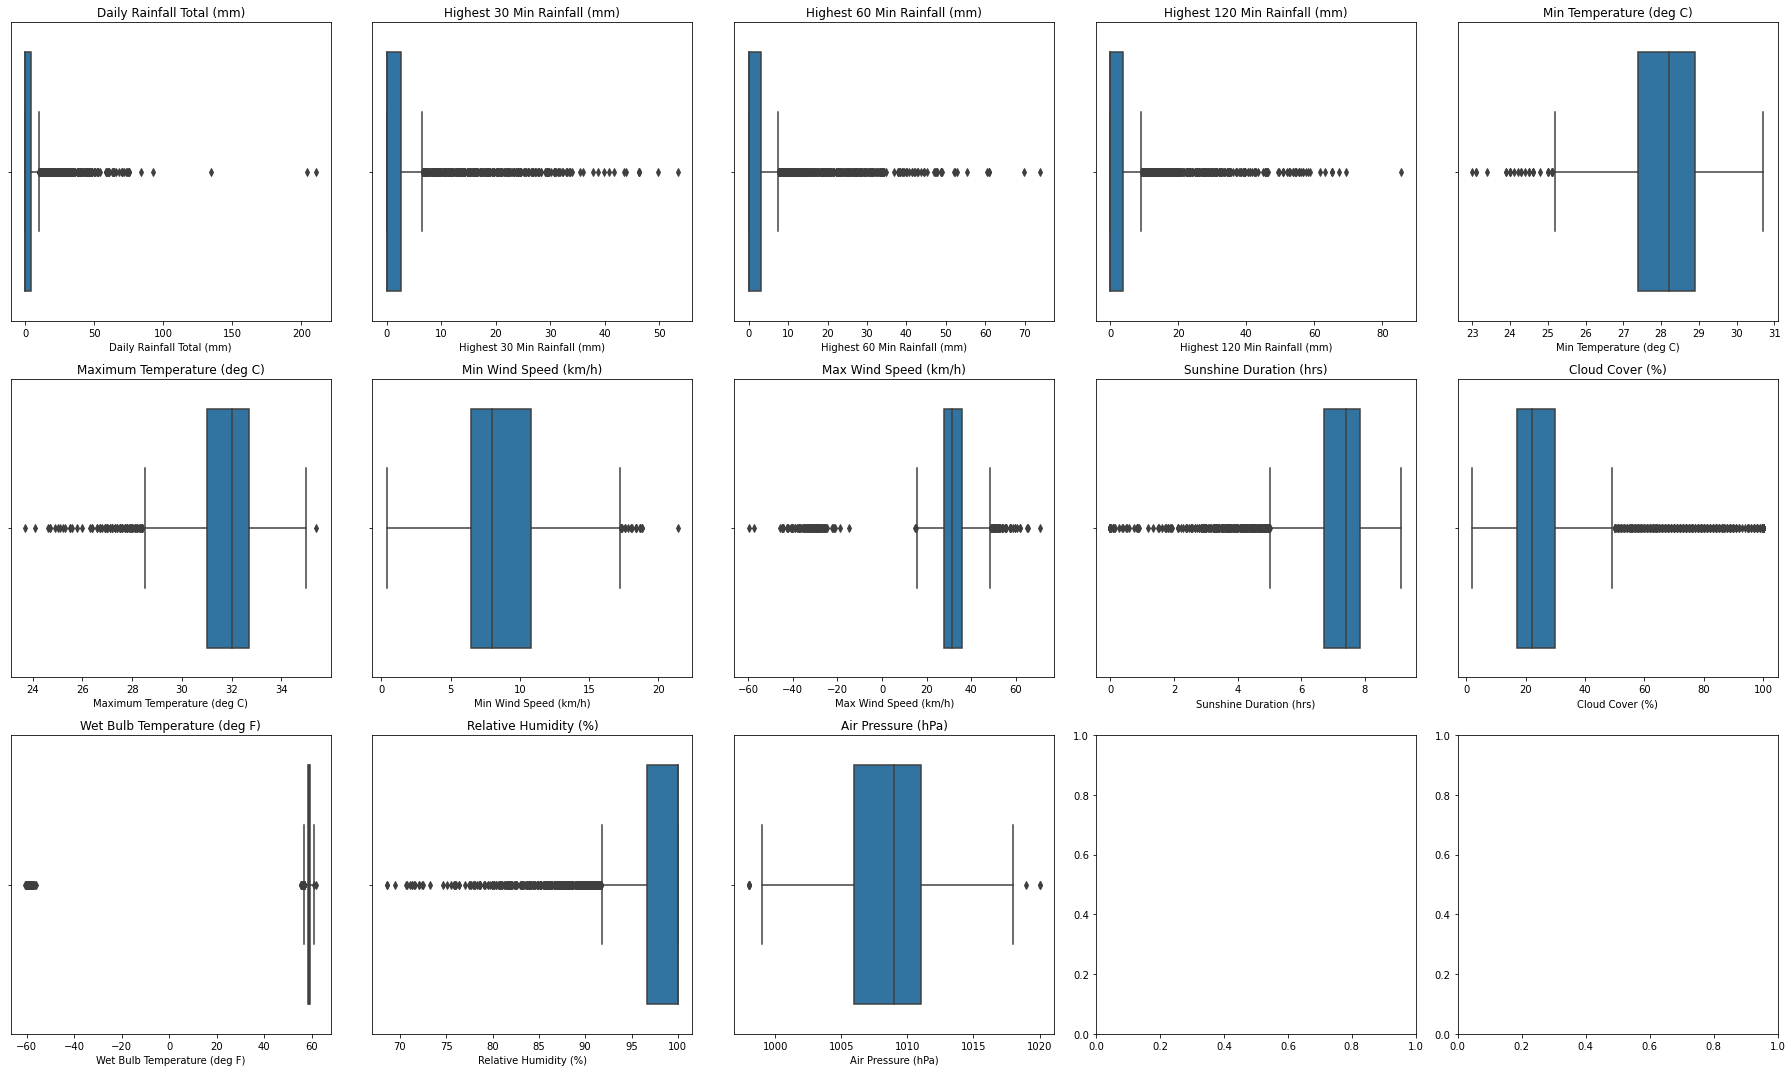

In [11]:
#Box Plots for Outlier Detection

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for i, col in enumerate(air_quality_numeric_cols):
    sns.boxplot(x=air_quality_df[col], ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15))
for i, col in enumerate(weather_numeric_cols):
    sns.boxplot(x=weather_df[col], ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
plt.tight_layout()
plt.show()


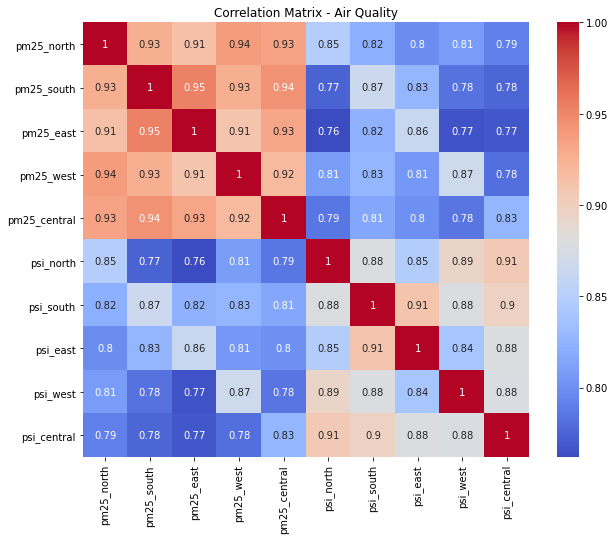

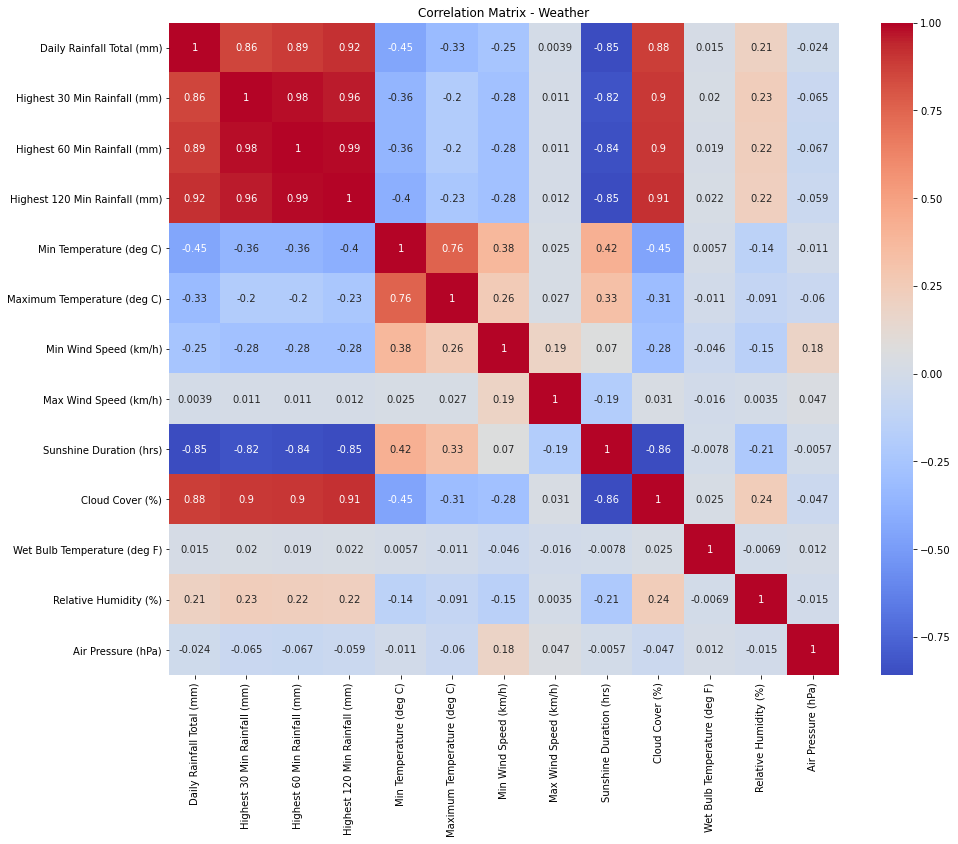

In [12]:
#Correlation Heatmap

# Correlation matrix for air quality
corr_air_quality = air_quality_df[air_quality_numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_air_quality, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Air Quality')
plt.show()

# Correlation matrix for weather
corr_weather = weather_df[weather_numeric_cols].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_weather, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Weather')
plt.show()


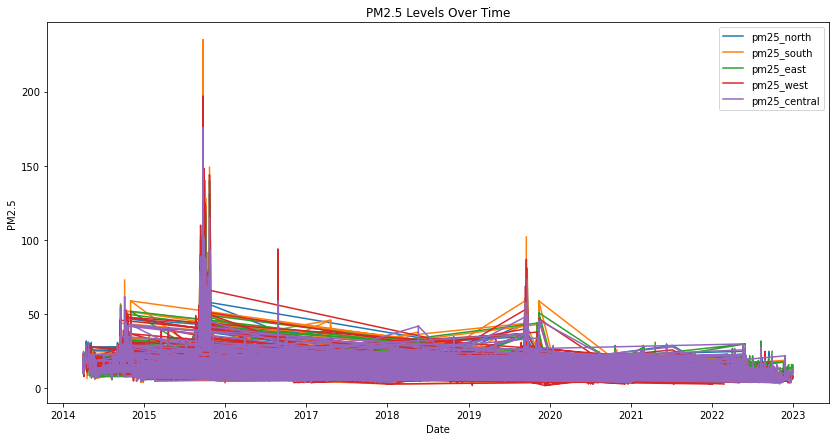

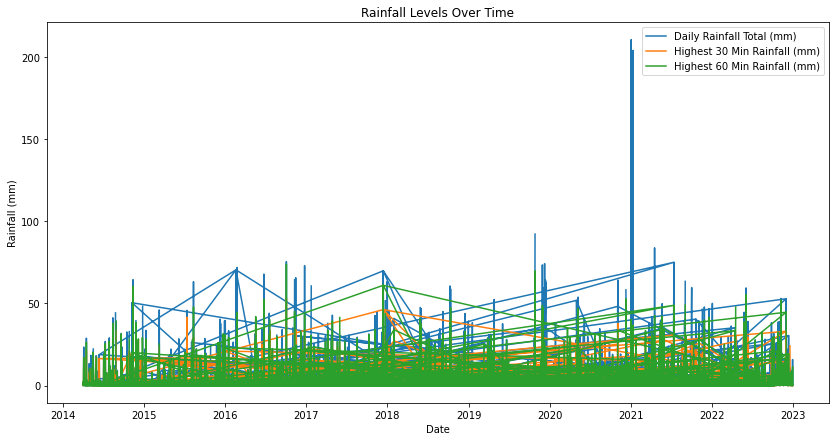

In [13]:
 #Time Series Analysis
# Convert date columns to datetime
air_quality_df['date'] = pd.to_datetime(air_quality_df['date'], format='%d/%m/%Y')
weather_df['date'] = pd.to_datetime(weather_df['date'], format='%d/%m/%Y')

# Plotting time series data for air quality
plt.figure(figsize=(14, 7))
for col in air_quality_numeric_cols[:5]:  # PM2.5 values
    plt.plot(air_quality_df['date'], air_quality_df[col], label=col)
plt.legend()
plt.title('PM2.5 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.show()

# Plotting time series data for weather
plt.figure(figsize=(14, 7))
for col in weather_numeric_cols[:3]:  # Rainfall values
    plt.plot(weather_df['date'], weather_df[col], label=col)
plt.legend()
plt.title('Rainfall Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.show()

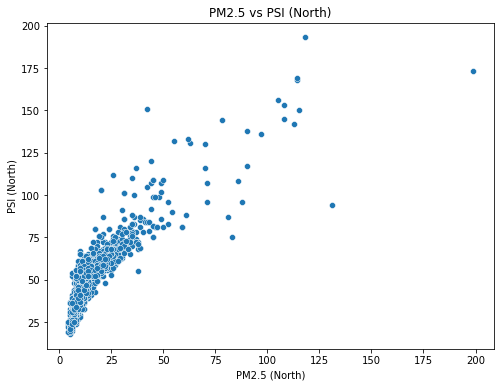

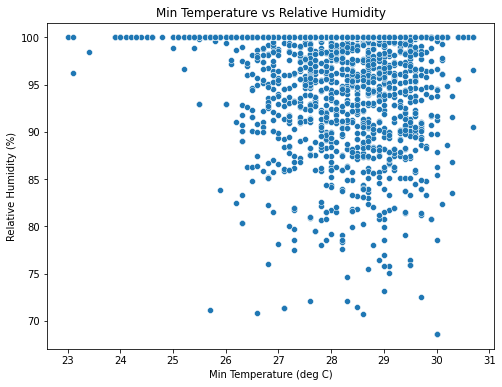

In [14]:
#Scatter Plots for Relationship Analysis

# Scatter plot to show relationship between PM2.5 and PSI in the north region
plt.figure(figsize=(8, 6))
sns.scatterplot(x=air_quality_df['pm25_north'], y=air_quality_df['psi_north'])
plt.title('PM2.5 vs PSI (North)')
plt.xlabel('PM2.5 (North)')
plt.ylabel('PSI (North)')
plt.show()

# Scatter plot to show relationship between Temperature and Relative Humidity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=weather_df['Min Temperature (deg C)'], y=weather_df['Relative Humidity (%)'])
plt.title('Min Temperature vs Relative Humidity')
plt.xlabel('Min Temperature (deg C)')
plt.ylabel('Relative Humidity (%)')
plt.show()
